#  Python ile Veri Bilimi Projesi



# Kütüphanelerimizin eklenmesi

In [8]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

## Veri Setimizin yüklenmesi
Yüklenen veri setini kendimize uygun hale getirip kullanmayacağımız kısımlarını drop() ile çıkardıktan sonra ekrana yazdırıyoruz

In [9]:
vgames = pd.read_csv('C:/Users/onur_/OneDrive/Masaüstü/Kütüphane/Ders/python ile veri bilimi/python veri bilimi ödev dataset/Video_Games_Sales_as_at_22_Dec_2016.csv')  
vgames = vgames.drop(columns=['Critic_Score', 'Critic_Count','User_Score', 'User_Count','Developer','Rating'])
vgames = vgames.rename(columns={'Year_of_Release':'Year'})
vgames

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01


### Veri Setimizin son halinde eksik değer olup olmadığını ısı haritasını görerek kolay bulunabilir hale getiriyoruz

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


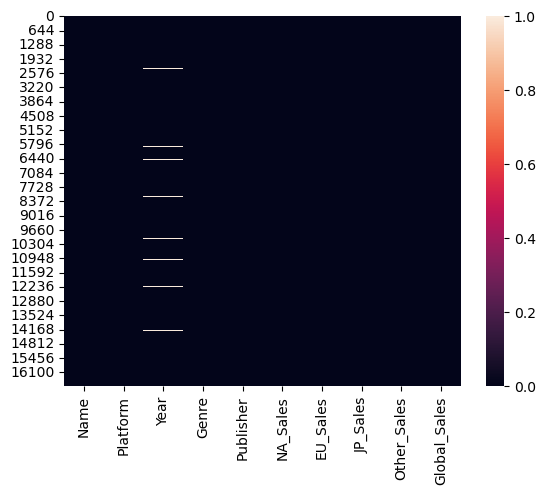

(16719, 10) 



In [10]:
display(vgames.head())

sns.heatmap(vgames.isnull())
plt.show()

print(vgames.shape, "\n")

plt.show()


### En son halinde eksik değerimizin veri setimiz üzerinde büyük bir etkisi olmadığı için onları çıkarıyoruz

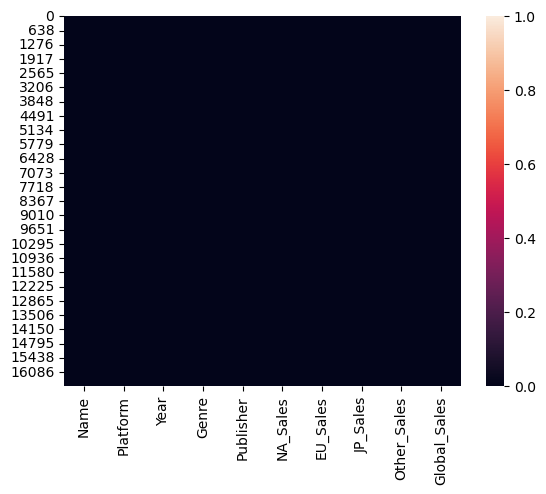

(16418, 10) 



In [11]:
vgames = vgames.dropna(subset=['Publisher','Year'])
sns.heatmap(vgames.isnull())
plt.show()
print(vgames.shape, "\n")

#### Veri Setimizde değer olarak kullanacağımız kısımları  ve object olanları daha rahat görmek için info() fonk. kullanıyoruz
Describe() da ise object olmayan kısımların count, mean, std, min, max, ve çeyreklik değerlerini bize gösteriyor 

In [12]:
print('Satır :', vgames.shape[0])
print('Sütun :', vgames.shape[1])
print(vgames.info(),'\n')
print(vgames.describe())

Satır : 16418
Sütun : 10
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16418 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16416 non-null  object 
 1   Platform      16418 non-null  object 
 2   Year          16418 non-null  float64
 3   Genre         16416 non-null  object 
 4   Publisher     16418 non-null  object 
 5   NA_Sales      16418 non-null  float64
 6   EU_Sales      16418 non-null  float64
 7   JP_Sales      16418 non-null  float64
 8   Other_Sales   16418 non-null  float64
 9   Global_Sales  16418 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB
None 

               Year      NA_Sales      EU_Sales      JP_Sales   Other_Sales  \
count  16418.000000  16418.000000  16418.000000  16418.000000  16418.000000   
mean    2006.488245      0.264205      0.146048      0.078615      0.047669   
std        5.882674      0.819066      0.507113      0

#### Oyun yayımcılarının toplam ne kadar satış yaptıklarını Global_Sales 'e göre sıralı bir biçimde gösteriyoruz
Böylelikle en çok satış yapan 10 firmayı bulmuş oluyoruz.

In [13]:
publishercol = vgames.drop(columns = ['Year', 'Genre', 'Name','Platform'])
publishersum = publishercol.groupby('Publisher').sum()
publishersum = publishersum.sort_values(by=['Global_Sales'], ascending=False).head(10)
publishersum = publishersum.rename(index={'Electronic Arts':'EA',
                                    'Sony Computer Entertainment': 'Sony',
                                    'Take-Two Interactive': 'Take-Two',
                                    'Konami Digital Entertainment':'Konami',
                                    'Namco Bandai Games':'Namco'})
publishersum

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Nintendo,815.86,418.58,457.74,94.55,1786.72
EA,588.65,370.02,14.29,126.82,1100.05
Activision,428.92,214.10,6.71,75.27,725.14
Sony,266.17,186.40,74.15,79.62,606.27
Ubisoft,252.12,161.72,7.35,49.09,470.45
Take-Two,222.92,119.06,5.93,55.68,403.58
THQ,207.55,93.66,5.01,31.87,338.11
Konami,88.67,67.93,91.03,29.54,277.36
Sega,107.99,80.08,56.22,23.59,268.11


##### Global_Sales ı droplayıp Genel olarak Firmaların ortalama ne kadar sattığını mean() ini alarak görüyoruz

In [14]:
publishermean = publishersum.drop(columns = 'Global_Sales')
publishermean = publishermean.mean(axis=1) 
publishermean

Publisher
Nintendo      446.6825
EA            274.9450
Activision    181.2500
Sony          151.5850
Ubisoft       117.5700
Take-Two      100.8975
THQ            84.5225
Konami         69.2925
Sega           66.9700
Namco          63.5175
dtype: float64

### Toplam satışı ve bölgelere göre satışı grafik olarak daha rahat görmemizi sağlayacak şekilde görselleştirdik

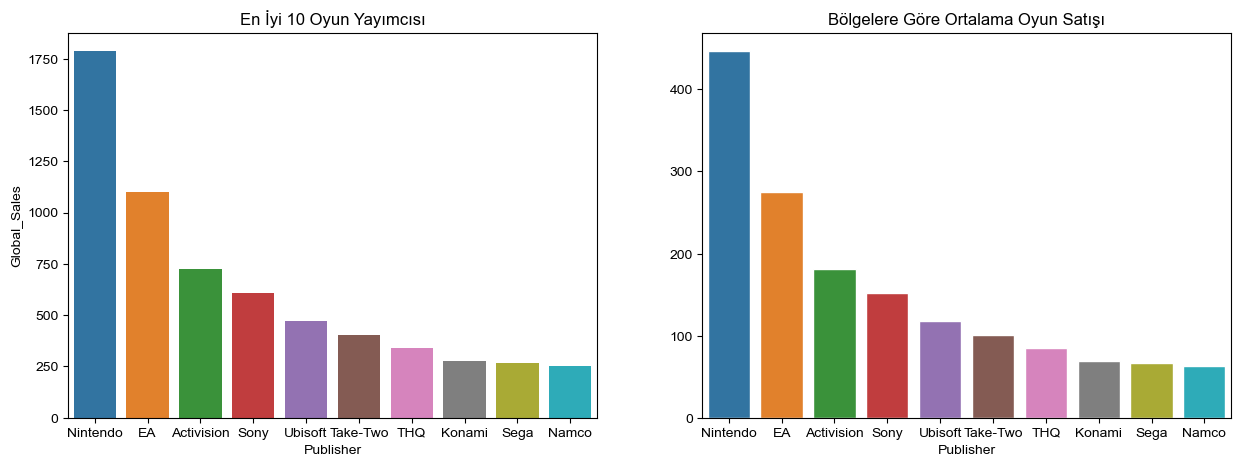

In [15]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.barplot(x=publishersum.index, y=publishersum['Global_Sales'], ax=ax[0])
sns.set_style("whitegrid")
ax[0].set_title('En İyi 10 Oyun Yayımcısı')

sns.barplot(x=publishermean.index, y=publishermean, ax=ax[1])
sns.set_style("darkgrid")
ax[1].set_title('Bölgelere Göre Ortalama Oyun Satışı')
plt.show()

#### Hangi bölgede hangi yayımcının daha çok satış yaptığı ise aşağıdaki ısı haritasında gösterilmiştir

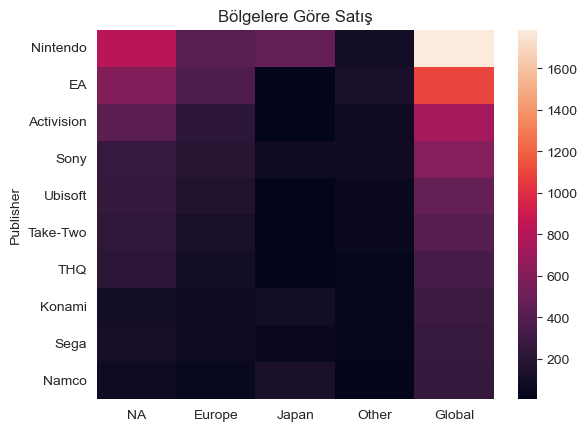

In [16]:
publisherheatmap = publishersum.rename(columns={'NA_Sales':'NA',
                                    'EU_Sales': 'Europe',
                                    'JP_Sales': 'Japan',
                                    'Other_Sales':'Other',
                                    'Global_Sales':'Global'})
sns.heatmap(publisherheatmap)
plt.title('Bölgelere Göre Satış')
plt.show()

## Şimdi ise satışlarda oyun türlerinin önemine bakıcaz

In [17]:
genre = vgames.drop(columns = ['Year','Name','Platform','Publisher'])
genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Sports,41.36,28.96,3.77,8.45,82.53
1,Platform,29.08,3.58,6.81,0.77,40.24
2,Racing,15.68,12.76,3.79,3.29,35.52
3,Sports,15.61,10.93,3.28,2.95,32.77
4,Role-Playing,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...
16714,Action,0.00,0.00,0.01,0.00,0.01
16715,Sports,0.00,0.01,0.00,0.00,0.01
16716,Adventure,0.00,0.00,0.01,0.00,0.01
16717,Platform,0.01,0.00,0.00,0.00,0.01


#### Oyun türlerinin toplam ne kadar sattığını bulup bunu Global olarak ne kadar sattığına göre sıralıyoruz

In [18]:
genrecounts = genre.groupby('Genre').count()
genrecounts = genrecounts.rename(index={'Role-Playing':'Roleplay'})
genrecounts = genrecounts.sort_values('Global_Sales', ascending=False)
genrecounts

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,3307,3307,3307,3307,3307
Sports,2306,2306,2306,2306,2306
Misc,1697,1697,1697,1697,1697
Roleplay,1483,1483,1483,1483,1483
Shooter,1296,1296,1296,1296,1296
Adventure,1291,1291,1291,1291,1291
Racing,1225,1225,1225,1225,1225
Platform,878,878,878,878,878
Simulation,855,855,855,855,855


### Sıraladığımız verileri görsel olarak daha iyi görmek için grafiğini gösteriyoruz

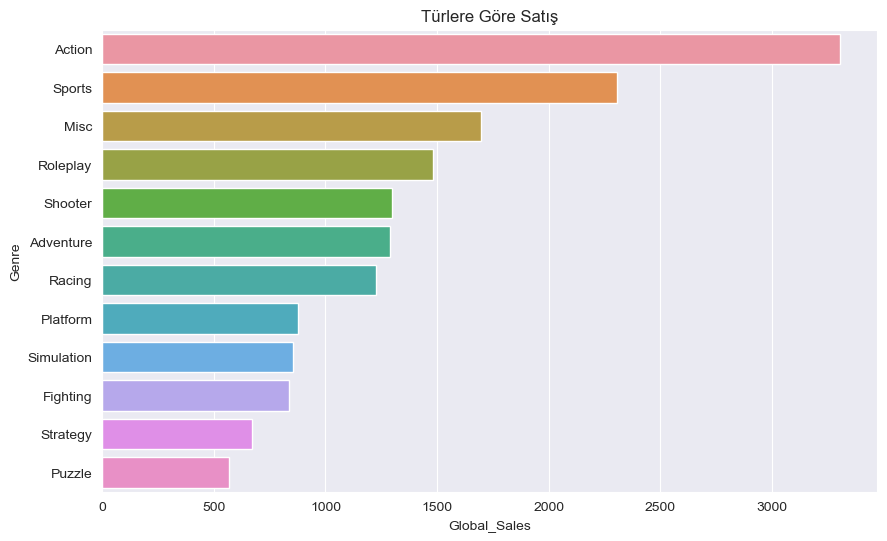

In [19]:
plt.figure(figsize=(10,6))
plt.title("Türlere Göre Satış")
sns.barplot(x=genrecounts['Global_Sales'], y=genrecounts.index)
sns.set_style("darkgrid")

## Yayımcıların yıl bazında ne kadar büyüdüklerini inceliyoruz
Yıl bazlı ne kadar büyüklerine bakmak için elimizde bakmamız gerekenler sadece "Year" "Publisher" ve "Global_Sales" geri kalanları drop() ediyoruz

In [20]:
yeargrowth = vgames.drop(columns = ['Genre', 'Name','Platform','NA_Sales','EU_Sales', 'JP_Sales','NA_Sales', 'Other_Sales'])
yeargrowth

,Year,Publisher,Global_Sales
0,2006.0,Nintendo,82.53
1,1985.0,Nintendo,40.24
2,2008.0,Nintendo,35.52
3,2009.0,Nintendo,32.77
4,1996.0,Nintendo,31.37
...,...,...,...
16714,2016.0,Tecmo Koei,0.01
16715,2006.0,Codemasters,0.01
16716,2016.0,Idea Factory,0.01
16717,2003.0,Wanadoo,0.01


## Bütün yayımcılara bakmak yerine içlerinden günümüzde önemli olanlara bakarak incelemeyi kısa tutuyoruz.
Burada yeargrowth da tutuğumuz verilerimizi aşşağıda bakmak isteğimiz yayımcılarımıza aktarıyoruz

In [21]:
nintendogrow = yeargrowth[yeargrowth['Publisher'] == 'Nintendo']
eagrow = yeargrowth[yeargrowth['Publisher'] == 'Electronic Arts']
activisiongrow = yeargrowth[yeargrowth['Publisher'] == 'Activision']
sonygrow = yeargrowth[yeargrowth['Publisher'] == 'Sony Computer Entertainment']

## Bakmak isteğimizi yayımcılara aktardığımız verilerimizi yıl bazlı toplayarak o yıl global olarak ne kadar sattıklarını buluyoruz ve bunu grafiğe döküyoruz

C:\Users\onur_\AppData\Local\Temp\ipykernel_17884\3202016496.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nintendogrow = nintendogrow.groupby('Year').sum()
C:\Users\onur_\AppData\Local\Temp\ipykernel_17884\3202016496.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  eagrow = eagrow.groupby('Year').sum()
C:\Users\onur_\AppData\Local\Temp\ipykernel_17884\3202016496.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

Text(0.5, 1.0, 'Sony Sales Growth')

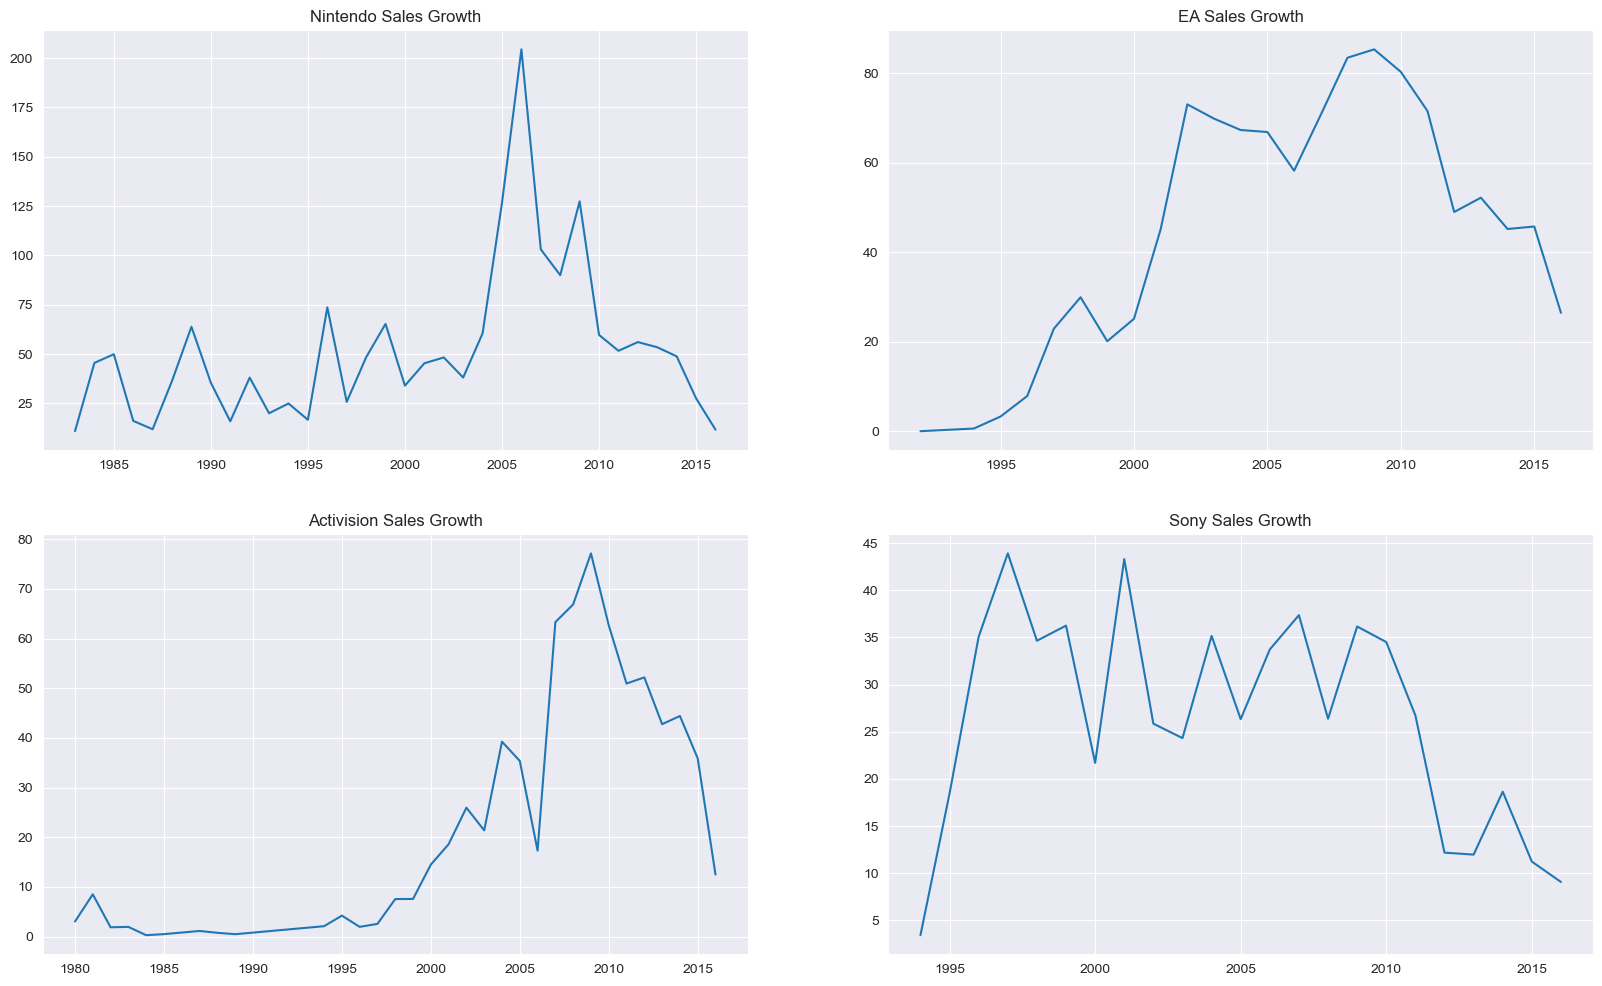

In [22]:
fig, ax = plt.subplots(2,2,figsize=(20,12))

nintendogrow = nintendogrow.groupby('Year').sum()
eagrow = eagrow.groupby('Year').sum()
activisiongrow = activisiongrow.groupby('Year').sum()
sonygrow = sonygrow.groupby('Year').sum()

ax[0,0].plot(nintendogrow)
ax[0,0].set_title('Nintendo Sales Growth')

ax[0,1].plot(eagrow)
ax[0,1].set_title('EA Sales Growth')

ax[1,0].plot(activisiongrow)
ax[1,0].set_title('Activision Sales Growth')

ax[1,1].plot(sonygrow)
ax[1,1].set_title('Sony Sales Growth')

## Burada Platformların Global_Sales üzerindeki etkisine bakıcaz
İhtiyacımız olan sadece platform ve Globa_Sales olduğu için geri kalanları drop() luyoruz

In [23]:
platform = vgames.drop(columns = ['Genre', 'Name','Year','Publisher','NA_Sales','EU_Sales', 'JP_Sales','NA_Sales', 'Other_Sales'])
platform = platform.groupby('Platform').count()
platform = platform.sort_values('Global_Sales', ascending=False)
platform = platform.head(10)
platform 

,Global_Sales
Platform,
PS2,2127
DS,2122
PS3,1306
Wii,1286
X360,1232
PSP,1193
PS,1190
PC,952
XB,803


## Burada Platformlarda yapılan global satışların grafiğe dökülmüş hali gözükmekte

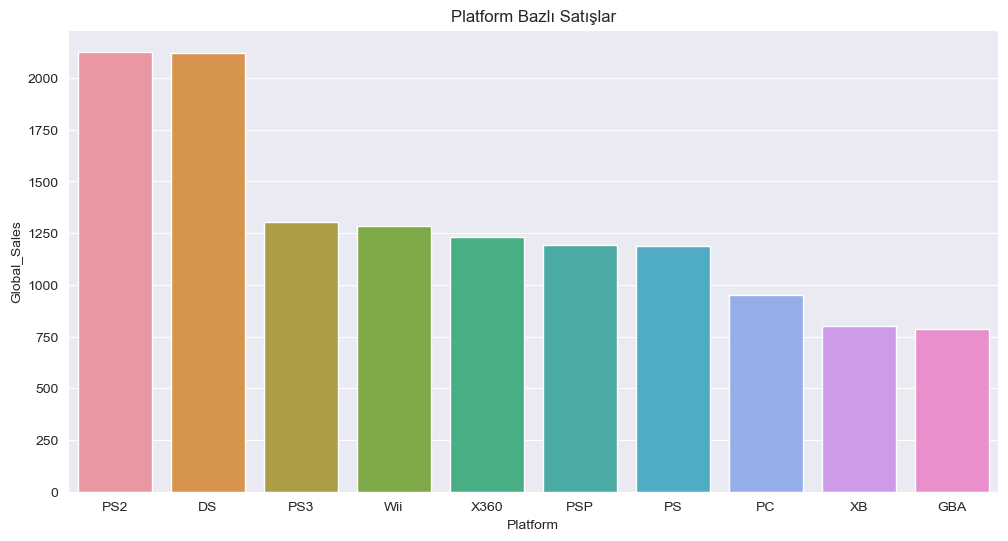

In [24]:
plt.figure(figsize=(12,6))
plt.title("Platform Bazlı Satışlar")
diverging_colors = sns.color_palette("hls", 8)
sns.set_palette(diverging_colors)
sns.barplot(x=platform.index, y=platform['Global_Sales'])

sns.set_style("darkgrid")

In [25]:
#!pip install skompiler
#!pip install astor
#!pip install xgboost
#!pip install catboost
#!pip install lightgbm
#conda install -c conda-forge lightgbm

In [26]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler



from warnings import filterwarnings
filterwarnings('ignore')

from datetime import datetime

In [27]:
df = vgames
df.index = df.iloc[:,0]
df = df.drop(columns = ['Name'])
df.index.name = None
df.head()

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### 2.1. K En Yakın Komşu (KNN)

In [28]:
dms = pd.get_dummies(df[[ 'Genre']])
y = df["Global_Sales"]
X_ = df.drop(['Genre',"Global_Sales","Platform","Publisher"], axis=1)
X = pd.concat([X_, dms[["Genre_Strategy","Genre_Sports","Genre_Simulation","Genre_Shooter","Genre_Role-Playing","Genre_Racing","Genre_Puzzle","Genre_Platform","Genre_Misc","Genre_Fighting","Genre_Adventure",'Genre_Action']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [29]:
knn_model

KNeighborsRegressor()

In [30]:
knn_model.n_neighbors #default değeri 5

5

In [31]:
knn_model.effective_metric_

'euclidean'

In [32]:
y_pred = knn_model.predict(X_test)

print("test hatası:" , np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE = [] 
#cross validation yapmadan hatalara bir bakalim
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)


test hatası: 0.8307201266775924
k = 1 için RMSE değeri:  0.002263772291601748
k = 2 için RMSE değeri:  0.1849021375073957
k = 3 için RMSE değeri:  0.23622475919398994
k = 4 için RMSE değeri:  0.26227086893134444
k = 5 için RMSE değeri:  0.2993226034790287
k = 6 için RMSE değeri:  0.31960078946596543
k = 7 için RMSE değeri:  0.3415304179254727
k = 8 için RMSE değeri:  0.37885644919693223
k = 9 için RMSE değeri:  0.4031896468491482
k = 10 için RMSE değeri:  0.42987608728359983


#### 2.1.3. Model Tuning

In [33]:
#GridSearchCV ile optimum k sayisinin belirlenmesi
knn_params = {'n_neighbors': np.arange(1,30,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [34]:
knn_cv_model.best_params_["n_neighbors"]

2

In [35]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    #cross validation olmadan hatalar
    RMSE.append(rmse) 
    #cross validation kullanilarak alindan hatalar
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )

k = 1 için RMSE değeri:  0.002263772291601748 RMSE_CV değeri:  0.38358822569092027
k = 2 için RMSE değeri:  0.1849021375073957 RMSE_CV değeri:  0.37401204652469927
k = 3 için RMSE değeri:  0.23622475919398994 RMSE_CV değeri:  0.3821105009019063
k = 4 için RMSE değeri:  0.26227086893134444 RMSE_CV değeri:  0.38733936989185364
k = 5 için RMSE değeri:  0.2993226034790287 RMSE_CV değeri:  0.402657293475359
k = 6 için RMSE değeri:  0.31960078946596543 RMSE_CV değeri:  0.4381576975886429
k = 7 için RMSE değeri:  0.3415304179254727 RMSE_CV değeri:  0.46266224280860585
k = 8 için RMSE değeri:  0.37885644919693223 RMSE_CV değeri:  0.493275096487233
k = 9 için RMSE değeri:  0.4031896468491482 RMSE_CV değeri:  0.5131840034500483
k = 10 için RMSE değeri:  0.42987608728359983 RMSE_CV değeri:  0.5331889779868518


In [36]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [37]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

0.8367977976800564

### 2.2. Destek Vektör Regresyonu (SVR)

In [38]:
dms = pd.get_dummies(df[[ 'Genre']])
y = df["Global_Sales"]
X_ = df.drop(['Genre',"Global_Sales","Platform","Publisher"], axis=1)
X = pd.concat([X_, dms[["Genre_Strategy","Genre_Sports","Genre_Simulation","Genre_Shooter","Genre_Role-Playing","Genre_Racing","Genre_Puzzle","Genre_Platform","Genre_Misc","Genre_Fighting","Genre_Adventure",'Genre_Action']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

svr_model = LinearSVR().fit(X_train, y_train)
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

print(pd.Series(svr_cv_model.best_params_)[0])

svr_tuned = LinearSVR(C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

0.30000000000000004


0.29785378507283544

In [39]:
svr_model.intercept_

array([0.00046506])

In [40]:
svr_model.coef_

array([-2.29068280e-06,  1.17869120e+00,  7.37477542e-01,  4.15277064e-01,
        2.51776757e-01, -1.24818941e-02, -2.94859370e-03, -3.03335987e-03,
        1.49477510e-02,  2.04948402e-02,  4.61816493e-03, -3.63918418e-03,
        2.35193778e-02, -1.18167439e-02,  1.20492532e-03, -2.90581083e-02,
       -1.41476311e-03])

### 2.3. Çok Katmanlı Algılayıcı (Yapay Sinir Ağları YSA)

In [41]:
dms = pd.get_dummies(df[[ 'Genre']])
y = df["Global_Sales"]
X_ = df.drop(['Genre',"Global_Sales","Platform","Publisher"], axis=1)
X = pd.concat([X_, dms[["Genre_Strategy","Genre_Sports","Genre_Simulation","Genre_Shooter","Genre_Role-Playing","Genre_Racing","Genre_Puzzle","Genre_Platform","Genre_Misc","Genre_Fighting","Genre_Adventure",'Genre_Action']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [42]:
#değişken standartlaştırması
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)
print(mlp_model)
print(mlp_model.n_layers_)
print(mlp_model.hidden_layer_sizes)

MLPRegressor(hidden_layer_sizes=(100, 20))
4
(100, 20)


#### 2.3.2.Tahmin

In [44]:
y_pred = mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

0.022698851923980582

#### 2.3.3. Model Tuning

In [45]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [46]:
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             'activation': ['relu','logistic']}

In [47]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 5)
mlp_cv_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]})

In [48]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (300, 200, 150)}

In [49]:
mlp_tuned = MLPRegressor(activation=mlp_cv_model.best_params_['activation'],
                         alpha = mlp_cv_model.best_params_['alpha'], 
                         hidden_layer_sizes = mlp_cv_model.best_params_['hidden_layer_sizes'])
print(mlp_tuned)
print(mlp_tuned.activation)

MLPRegressor(alpha=0.1, hidden_layer_sizes=(300, 200, 150))
relu


In [50]:
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.1, hidden_layer_sizes=(300, 200, 150))

In [51]:
y_pred = mlp_tuned.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

0.008593734246499663

### 2.4. Karar Ağaçları / Classification and Regression Trees (CART)

In [52]:
dms = pd.get_dummies(df[[ 'Genre']])
y = df["Global_Sales"]
X_ = df.drop(['Genre',"Global_Sales","Platform","Publisher"], axis=1)
X = pd.concat([X_, dms[["Genre_Strategy","Genre_Sports","Genre_Simulation","Genre_Shooter","Genre_Role-Playing","Genre_Racing","Genre_Puzzle","Genre_Platform","Genre_Misc","Genre_Fighting","Genre_Adventure",'Genre_Action']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [53]:
#ilkel test hatasina bir bakalim
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

#cross validation
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)
cart_cv_model.fit(X_train, y_train)
print(cart_cv_model.best_params_)
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = cart_cv_model.best_params_['max_leaf_nodes'], 
                                   min_samples_split = cart_cv_model.best_params_['min_samples_split'])
cart_tuned.fit(X_train, y_train)
y_pred = cart_tuned.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.6957722858740577
{'max_leaf_nodes': 9, 'min_samples_split': 38}
1.0215860755625057


### 2.5. Random Forests

In [54]:
dms = pd.get_dummies(df[[ 'Genre']])
y = df["Global_Sales"]
X_ = df.drop(['Genre',"Global_Sales","Platform","Publisher"], axis=1)
X = pd.concat([X_, dms[["Genre_Strategy","Genre_Sports","Genre_Simulation","Genre_Shooter","Genre_Role-Playing","Genre_Racing","Genre_Puzzle","Genre_Platform","Genre_Misc","Genre_Fighting","Genre_Adventure",'Genre_Action']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [55]:
rf_model = RandomForestRegressor(random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [56]:
rf_model.predict(X_test)[0:5]

array([0.0862  , 0.3244  , 0.060245, 0.01116 , 0.1916  ])

In [57]:
y_pred = rf_model.predict(X_test)

In [58]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.7581234923262012

In [59]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}
rf_model = RandomForestRegressor(random_state = 42)
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)
# n_jobs = -1 yukarida yapılacak hesap sayisi her bir degerin kombinasyonu dusunuldugunde cok fazla olmaktadır.
#n_jobs parametresi islemcinin paralel yurutebilecegi islemleri ayni anda yurutmesini saglamaktadır.

In [60]:
rf_cv_model.fit(X_train, y_train)
rf_cv_model.best_params_

{'max_depth': 9, 'max_features': 15, 'n_estimators': 200}

In [61]:
rf_tuned = RandomForestRegressor(max_depth  = 8, 
                                 max_features = 3, 
                                 n_estimators =200)

In [62]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_features=3, n_estimators=200)

In [63]:
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.9186863896762043

In [64]:
#degiskenlerin onem duzeyine bir bakalim.
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

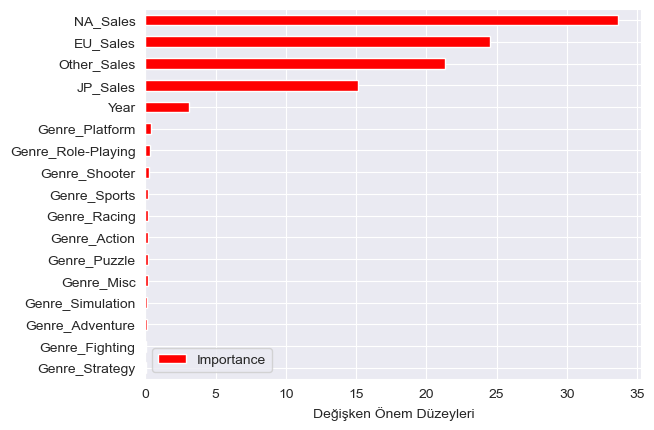

In [65]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# ÇIKARIM

K En Yakın Komşu (KNN) = 0.8367966623262725

Destek Vektör Regresyonu (SVR) = 0.2926665169310237

Çok Katmanlı Algılayıcı (Yapay Sinir Ağları YSA) = 0.03230901204910407

Karar Ağaçları (CART) = 1.0215860755625055

Random Forests = 0.9006727323078829 

Yukarıda kullandığım makine öğrenmesi uygulamalarından en düşük hataya sahip olan YSA olduğundan veri setimizde kullanacağımız 
Makine öğrenmesi uygulaması bu olacaktır.